In data science the importance of great story telling is commonly known. Through the use of better visualizations, data scientists can create more compelling stories on the projects they work on. Because of that, I'm going to practice using knew visualizations on an NBA Season Stats data set to work on this skill. I am using the same data set as I have for my first EECS 731 project. Now I am going to do very simialir analysis, but will use new, more compelling visualizations to tell the story.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('Seasons_Stats.csv')

For this analysis, I am only going to look at player data for the 2017 season. Because of that I will be dropping the rows for any player before that.

In [3]:
df.drop(df.index[:24096], inplace=True)

In [4]:
df.head

<bound method NDFrame.head of        Unnamed: 0    Year                 Player Pos   Age   Tm     G    GS  \
24096       24096  2017.0           Alex Abrines  SG  23.0  OKC  68.0   6.0   
24097       24097  2017.0             Quincy Acy  PF  26.0  TOT  38.0   1.0   
24098       24098  2017.0             Quincy Acy  PF  26.0  DAL   6.0   0.0   
24099       24099  2017.0             Quincy Acy  PF  26.0  BRK  32.0   1.0   
24100       24100  2017.0           Steven Adams   C  23.0  OKC  80.0  80.0   
24101       24101  2017.0          Arron Afflalo  SG  31.0  SAC  61.0  45.0   
24102       24102  2017.0          Alexis Ajinca   C  28.0  NOP  39.0  15.0   
24103       24103  2017.0           Cole Aldrich   C  28.0  MIN  62.0   0.0   
24104       24104  2017.0      LaMarcus Aldridge  PF  31.0  SAS  72.0  72.0   
24105       24105  2017.0            Lavoy Allen  PF  27.0  IND  61.0   5.0   
24106       24106  2017.0             Tony Allen  SG  35.0  MEM  71.0  66.0   
24107       24107  201

In [5]:
df.drop('Unnamed: 0', axis=1)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
24101,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,0.559,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
24102,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,0.529,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
24103,2017.0,Cole Aldrich,C,28.0,MIN,62.0,0.0,531.0,12.7,0.549,...,0.682,51.0,107.0,158.0,25.0,25.0,23.0,17.0,85.0,105.0
24104,2017.0,LaMarcus Aldridge,PF,31.0,SAS,72.0,72.0,2335.0,18.6,0.532,...,0.812,174.0,350.0,524.0,139.0,46.0,89.0,98.0,158.0,1243.0
24105,2017.0,Lavoy Allen,PF,27.0,IND,61.0,5.0,871.0,11.6,0.485,...,0.697,105.0,115.0,220.0,57.0,18.0,24.0,29.0,78.0,177.0


When I first created a visualization at the start of the semester, I did so using matplotlib. I am going to replicate those below to compare with the visualizations I will be creating in seaborn. The first data set looks at the basic relationship between games played and points scored.

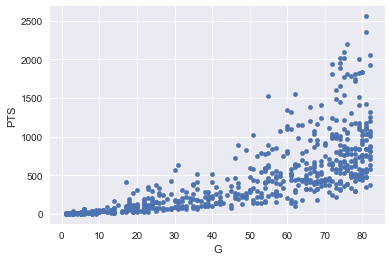

In [6]:
df.plot(x = 'G', y = 'PTS', kind = 'scatter')

Our intuition would tell us that the more games a player plays, the higher is total points scored in a season would be. We clearly see that in this first plot. 

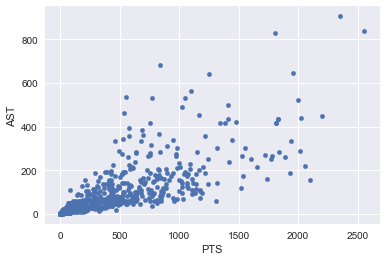

In [7]:
df.plot(x = 'PTS', y = 'AST', kind = 'scatter')

Something very interesting to me personally is the correlation between total points scored and total assists. Among basketball analyst, it is often believed that players who score a lot of points, but fail to also produce a high volume of assists are one-dimensional and selfish players. That being said, I wanted to visualize what this relationship looked like for the 2017 season. It is also important to note, Big men who play in the front court (powerforward or center) may score a lot of points, but don't necessarily dish out a lot of assists, as that doesn't follow their role on the team. Because of that, I am going to do another plot looking at PTS and rebounds.

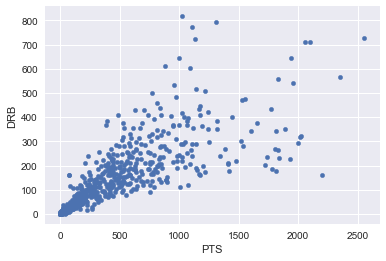

In [8]:
df.plot(x = 'PTS', y = 'DRB', kind = 'scatter')

Interestingly enough, the graph looking at points vs rebounds is also very simialir to the one with assists. I am going to also look at the scatterplot comparing points to TS%. TS% attempts to see how efficient a player is, so I doubt it would be correlated to total points scored, as there are many inefficient players who score a lot of points simply because they take so many shots

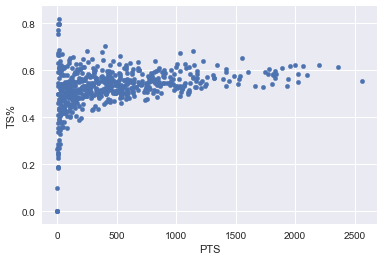

In [9]:
df.plot(x = 'PTS', y = 'TS%', kind = 'scatter')

Now that I have made some basic visualizations in matplotlib, I'm going to use seaborn along with some of its more advanced features. Similairly to the first plot, I'm going to create a scatter between points and games played. This time I'm going to color code the data by position, so we can have another attribute being assessed in our graphs

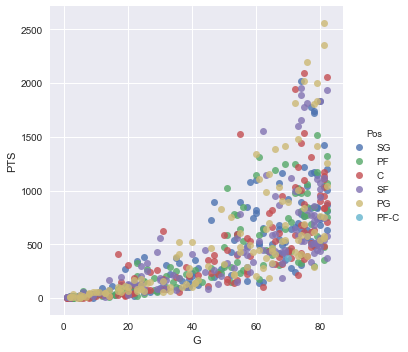

In [10]:
sns.lmplot(x='G', y='PTS', data=df, fit_reg=False, hue='Pos')

In seaborn, we can also make histograms to get better information on how different stats are distributed.

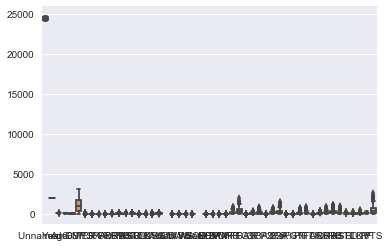

In [11]:
sns.boxplot(data=df)

The above histogram is virtually unreadable. I'm going to create a histogram on major attributes like points, assists, and rebounds to see how these variables are distributed.

In [12]:
df2 = df[['PTS','AST','ORB', 'DRB']]

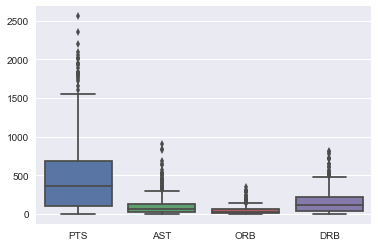

In [13]:
sns.boxplot(data=df2)

Using Seaborn, I can also plot distributions of positions compared to these various attributes. To do this I am going to create violinplots of different positions and the attributes used above.

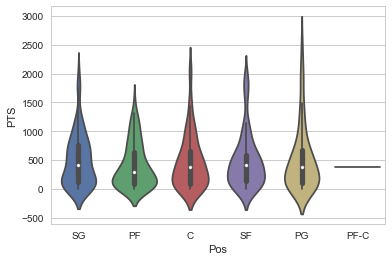

In [14]:
sns.set_style('whitegrid')
sns.violinplot(x= 'Pos', y='PTS', data=df)

I wasn't sure what to expect with points compared to position. In the modern NBA, no position really dominates scoring, but point guard scoring has been increasing. This can be seen specifically in the 2017 season using the plot above.

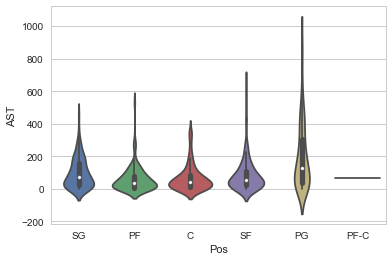

In [15]:
sns.violinplot(x= 'Pos', y='AST', data=df)

As expected, point guards lead the league in assists, and Centers are at the bottom of the league in assists.

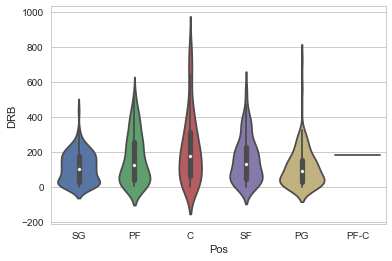

In [16]:
sns.violinplot(x= 'Pos', y='DRB', data=df)

Centers lead this distribution as expected, powerforwards are surprisingly low for this distribution.

In [17]:
stats = df[['Player', 'Pos', 'PTS','AST','ORB', 'DRB', 'TS%', 'FT%', 'STL', 'BLK']]

I am going to create a new data frame called stats that only have the attributes I personally find important when evaulating a player. Using that, I am going to use the melt function in pandas to create an overall value combining these different attributes.

In [18]:
melted_df = pd.melt(stats, 
                    id_vars=["Player", 'Pos'], 
                    var_name="Overall") 

In [19]:
melted_df.tail()

,Player,Pos,Overall,value
4755,Cody Zeller,PF,BLK,58.0
4756,Tyler Zeller,C,BLK,21.0
4757,Stephen Zimmerman,C,BLK,5.0
4758,Paul Zipser,SF,BLK,16.0
4759,Ivica Zubac,C,BLK,33.0


With this new df, we can make a swarm plot to visualize the different stats, also looking at position.

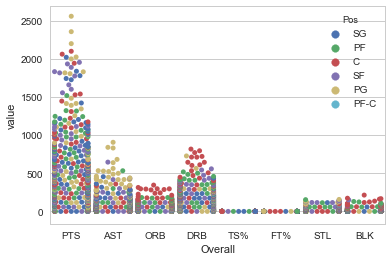

In [20]:
sns.swarmplot(x='Overall', y='value', data=melted_df, 
              hue='Pos')

I'm going to adjust the swarm plot so that it is a little easier to view.

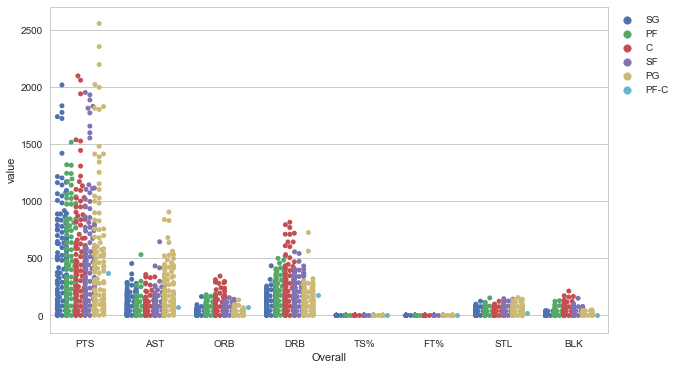

In [21]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Overall', 
              y='value', 
              data=melted_df, 
              hue='Pos', 
              dodge=True,)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

We plotted different relationships between attributes, but we can also create a heatmap to view the specific correlations between each attribute.

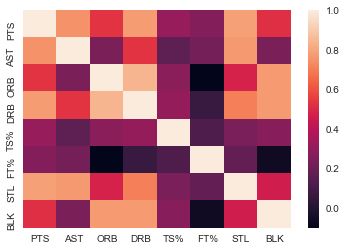

In [22]:
corr = stats.corr()
sns.heatmap(corr)

From the heatmap, we can see how variables such as points and assists have high correlations, but FTpercentage and blocks have virtually no correlation. The latter makes sense, given players who often get Blocks are centers or powerforward with a lot of height. These players tend not to be the best free throw shooters.

We can also create histograms to plot the distribution of individual attributes.

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


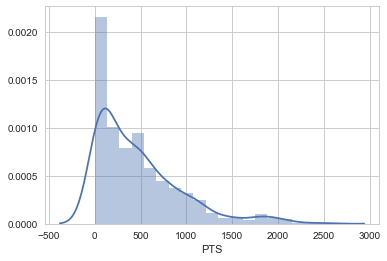

In [46]:
sns.distplot(df.PTS)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


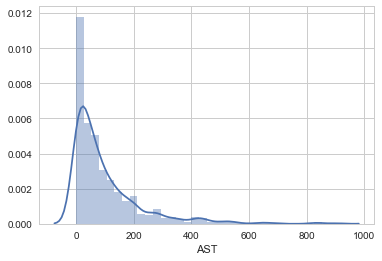

In [48]:
sns.distplot(df.AST)

We can also use Seeabor to visualize how many players there are at each position in the dataset. 

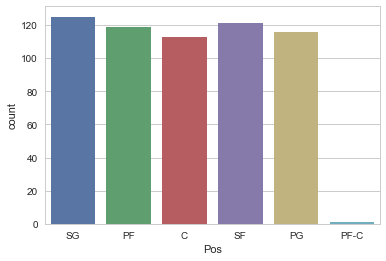

In [50]:
sns.countplot(x='Pos', data=df,)

If we want to look more closely at distributions between two variables, we can use density plots. I'm going to plot two density plots of attributes we know are correlated from the heatmap to see what they look like.

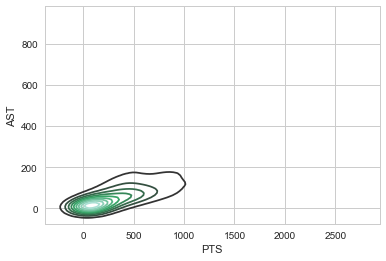

In [52]:
sns.kdeplot(df.PTS, df.AST)

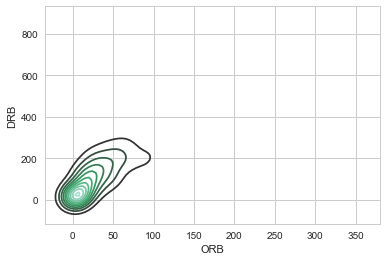

In [53]:
sns.kdeplot(df.ORB, df.DRB)

If we want, we can also plot joint plots that combine the information of histograms and scatterplots to give us further detail of a bi-variate distribution.

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


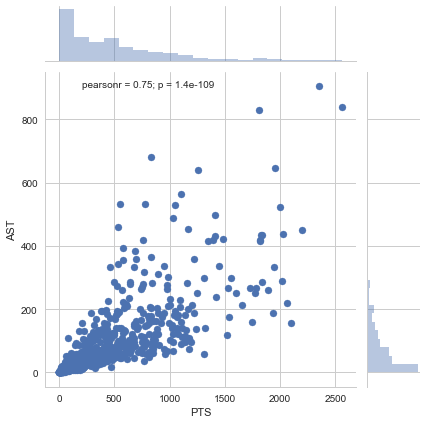

In [54]:
sns.jointplot(x='PTS', y='AST', data=df)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


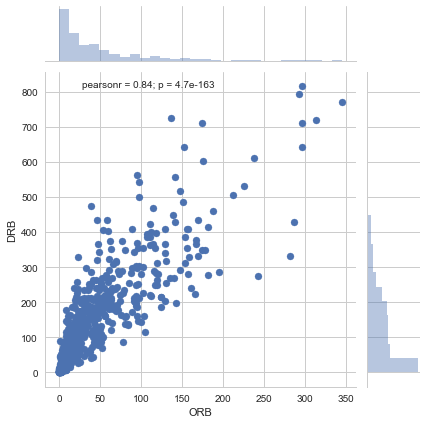

In [55]:
sns.jointplot(x='ORB', y='DRB', data=df)